<h1 style="text-align: center; color: Orange;">Immigrants</h1>

An immigrant is a person who moves from one country to another to reside there permanently or for an extended period. Immigrants leave their home country and enter a foreign country to establish a new life. This migration can be for various reasons, including seeking better economic opportunities, escaping political persecution, reuniting with family members, or pursuing education and career prospects.

Immigrants can come from diverse backgrounds, cultures, and countries and contribute to the host country's cultural, social, and economic fabric. Immigration has been a significant aspect of human history, and many countries have established immigration policies and procedures to regulate the entry and integration of immigrants into their societies.

<h2 style="text-align: center; color: Green;">Barcelona Immigration 2019-2021 Analysis</h2>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
immigrations=pd.read_csv("immigration.csv")

In [3]:
immigrations.head()

,Year,District,Neighbourhood,Place_of_origin,Amount
0,2019,Ciutat Vella,el Raval,Andalusia,95
1,2019,Ciutat Vella,el Barri Gotic,Andalusia,64
2,2019,Ciutat Vella,la Barceloneta,Andalusia,41
3,2019,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Andalusia,67
4,2019,Eixample,el Fort Pienc,Andalusia,41


In [4]:
immigrations.tail()

,Year,District,Neighbourhood,Place_of_origin,Amount
4375,2021,Sant Marti,la Verneda i la Pau,Basque Country,12
4376,2021,Sant Marti,la Verneda i la Pau,Rioja,2
4377,2021,Sant Marti,la Verneda i la Pau,Ceuta,2
4378,2021,Sant Marti,la Verneda i la Pau,Melilla,2
4379,2021,Sant Marti,la Verneda i la Pau,Foreign countries,389


In [5]:
immigrations.shape

(4380, 5)

In [6]:
immigrations["Amount"].describe()

count    4380.000000
mean       66.310274
std       245.410230
min         0.000000
25%         1.000000
50%         5.000000
75%        19.000000
max      4199.000000
Name: Amount, dtype: float64

<h3 style="text-align: center; color: Green;">Number of Immigrants in each Year</h3>

In [7]:
yearly_immigration_sum = immigrations.groupby('Year')['Amount'].sum().reset_index()
yearly_immigration_sum

,Year,Amount
0,2019,115308
1,2020,75408
2,2021,99723


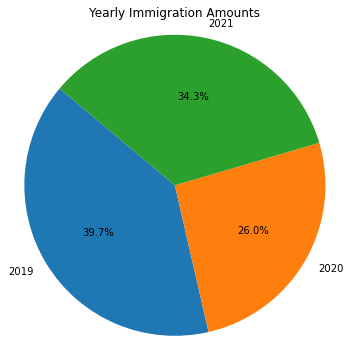

In [8]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(yearly_immigration_sum['Amount'], labels=yearly_immigration_sum['Year'], autopct='%1.1f%%', startangle=140)
plt.title('Yearly Immigration Amounts')
plt.axis('equal')  

# Display the pie chart
plt.show()


<h3 style="text-align: center; color: Green;">Number of Immigrants from each District</h3>

In [9]:
district_immigration_sum = immigrations.groupby('District')['Amount'].sum().reset_index()


In [10]:
district_immigration_sum

,District,Amount
0,Ciutat Vella,38029
1,Eixample,58309
2,Gracia,21018
3,Horta-Guinardo,23621
4,Les Corts,12583
5,Nou Barris,24173
6,Sant Andreu,18510
7,Sant Marti,37880
8,Sants-Montjuic,35937
9,Sarria-Sant Gervasi,20379


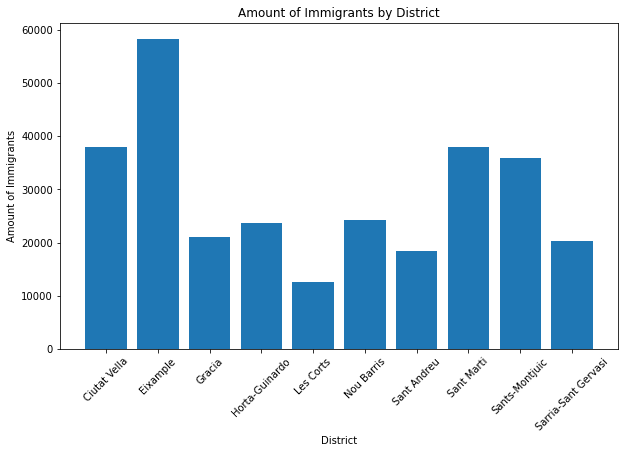

In [11]:
# Create a column (bar) chart
plt.figure(figsize=(10, 6))
plt.bar(district_immigration_sum['District'], district_immigration_sum['Amount'])
plt.xlabel('District')
plt.ylabel('Amount of Immigrants')
plt.title('Amount of Immigrants by District')

plt.xticks(rotation=45)

plt.show()

<h3 style="text-align: center; color: Green;">Number of Immigrants from each Place of Origin</h3>

In [12]:
origin_immigration_sum = immigrations.groupby('Place_of_origin')['Amount'].sum().reset_index()
origin_immigration_sum

,Place_of_origin,Amount
0,Andalusia,6525
1,Aragon,2167
2,Asturias,832
3,Balearic Islands,3768
4,Basque Country,1949
5,Canary Islands,2593
6,Cantabria,526
7,Castile and Leon,2081
8,Castile-La Mancha,1213
9,Catalonia,91286


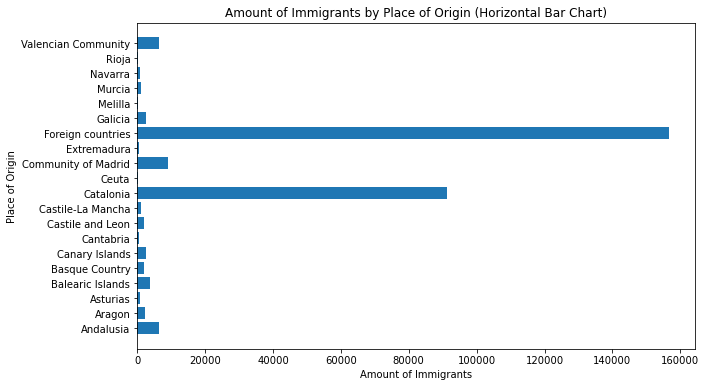

In [13]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(origin_immigration_sum['Place_of_origin'], origin_immigration_sum['Amount'])
plt.xlabel('Amount of Immigrants')
plt.ylabel('Place of Origin')
plt.title('Amount of Immigrants by Place of Origin (Horizontal Bar Chart)')

# Display the horizontal bar chart
plt.show()

<h3 style="text-align: center; color: Green;">Forecast of the Immigrants for the Following Year</h3>

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Group by 'Year' and calculate the total immigration for each year
yearly_immigration_total = immigrations.groupby('Year')['Amount'].sum().reset_index()


In [17]:
# Create a linear regression model
model = LinearRegression()

In [18]:
# Fit the model using historical data
X = np.array(yearly_immigration_total['Year']).reshape(-1, 1)
y = yearly_immigration_total['Amount']
model.fit(X, y)

LinearRegression()

In [19]:
# Forecast immigration for the next ten years
forecast_years = list(range(2022, 2023))
forecasted_immigration = model.predict(np.array(forecast_years).reshape(-1, 1))

In [20]:
# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted_Amount': forecasted_immigration})


In [21]:
# Display the forecasted data
print(forecast_df)

   Year  Forecasted_Amount
0  2022            81228.0


<h2 style="text-align: center; color: Green;">Conclusion</h2>

In summary, we explored data related to immigration, visualized it through bar charts, and discussed forecasting. While our initial analysis provided insights, real-world immigration forecasting is complex and requires advanced models. Careful consideration of historical trends and external factors is crucial for accurate predictions in immigration analytics.


<h1 style="text-align: center; color: Orange;">End</h1>